In [1]:
!pip install stldecompose

In [2]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from statsmodels.tsa.seasonal import STL

In [4]:
data=pd.read_csv('/content/LSTM-Multivariate_pollution.csv')
data

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [6]:
from datetime import datetime
# Function to remove time component from date string
def remove_time(date_string):
    date_object = datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S")
    return date_object.date()

# Apply the function to the 'date' column
data['date'] = data['date'].apply(remove_time)

# Print the updated DataFrame
print(data)

             date  pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
0      2010-01-02      129.0  -16  -4.0  1020.0      SE     1.79     0     0
1      2010-01-02      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2      2010-01-02      159.0  -11  -5.0  1021.0      SE     3.57     0     0
3      2010-01-02      181.0   -7  -5.0  1022.0      SE     5.36     1     0
4      2010-01-02      138.0   -7  -5.0  1022.0      SE     6.25     2     0
...           ...        ...  ...   ...     ...     ...      ...   ...   ...
43795  2014-12-31        8.0  -23  -2.0  1034.0      NW   231.97     0     0
43796  2014-12-31       10.0  -22  -3.0  1034.0      NW   237.78     0     0
43797  2014-12-31       10.0  -22  -3.0  1034.0      NW   242.70     0     0
43798  2014-12-31        8.0  -22  -4.0  1034.0      NW   246.72     0     0
43799  2014-12-31       12.0  -21  -3.0  1034.0      NW   249.85     0     0

[43800 rows x 9 columns]


In [7]:
data["wnd_dir"].unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [8]:
# Encoding the string based data feature into integers

def func(s):
    if s == "SE":
        return 1
    elif s == "NE":
        return 2
    elif s == "NW":
        return 3
    else:
        return 4

data["wind_dir"] = data["wnd_dir"].apply(func)

In [9]:
data=data.drop(['wnd_dir'],axis=1)

In [10]:
data

,date,pollution,dew,temp,press,wnd_spd,snow,rain,wind_dir
0,2010-01-02,129.0,-16,-4.0,1020.0,1.79,0,0,1
1,2010-01-02,148.0,-15,-4.0,1020.0,2.68,0,0,1
2,2010-01-02,159.0,-11,-5.0,1021.0,3.57,0,0,1
3,2010-01-02,181.0,-7,-5.0,1022.0,5.36,1,0,1
4,2010-01-02,138.0,-7,-5.0,1022.0,6.25,2,0,1
...,...,...,...,...,...,...,...,...,...
43795,2014-12-31,8.0,-23,-2.0,1034.0,231.97,0,0,3
43796,2014-12-31,10.0,-22,-3.0,1034.0,237.78,0,0,3
43797,2014-12-31,10.0,-22,-3.0,1034.0,242.70,0,0,3
43798,2014-12-31,8.0,-22,-4.0,1034.0,246.72,0,0,3


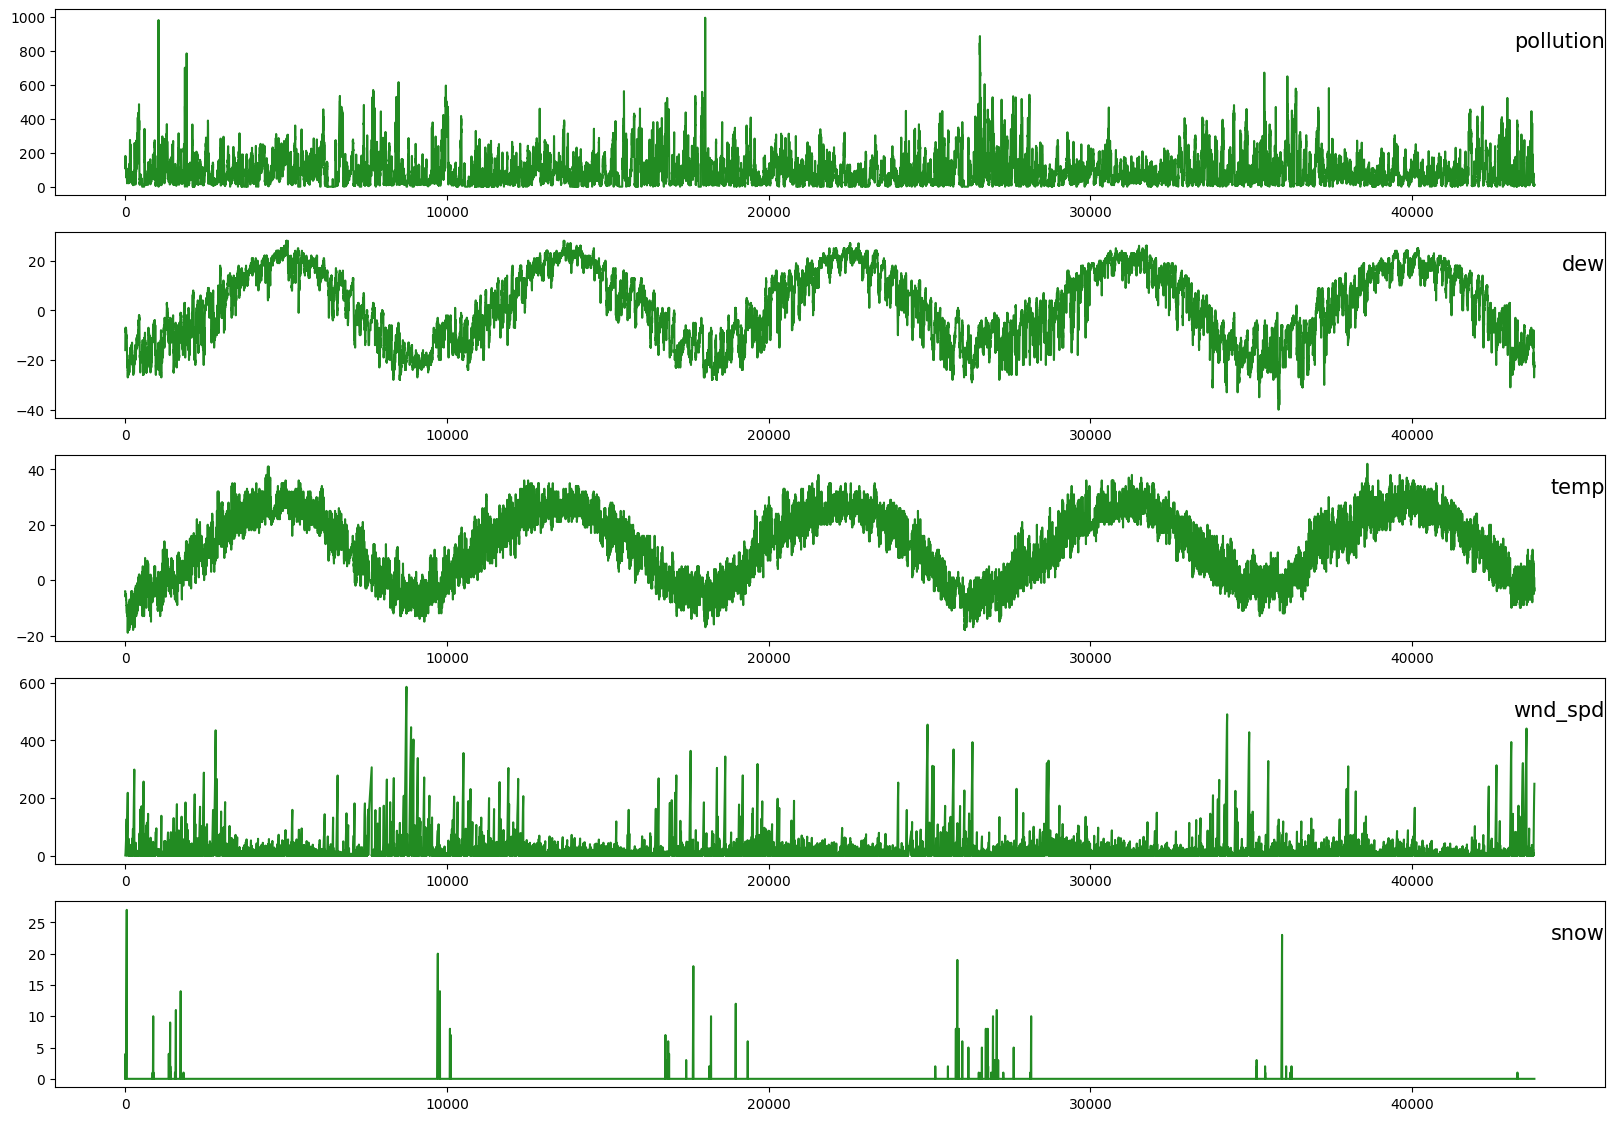

In [11]:
values = data.values

# specify columns to plot
groups = [1, 2, 3, 5, 6]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(data.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

In [12]:
start_date = "2010-01-02"

data_poll= data['pollution']
data_poll = list(data_poll)
num_periods = len(data_poll)
num_periods
# Create the date range with a suitable frequency
date_range = pd.date_range(start=start_date, periods=num_periods, freq="H")

# Create the Series with pollution data and the date range
data_poll_series = pd.Series(data_poll, index=date_range, name="POLL")

In [13]:
data_poll_series
data_poll_series.describe()
data_poll_series.head()

2010-01-02 00:00:00    129.0
2010-01-02 01:00:00    148.0
2010-01-02 02:00:00    159.0
2010-01-02 03:00:00    181.0
2010-01-02 04:00:00    138.0
Freq: H, Name: POLL, dtype: float64

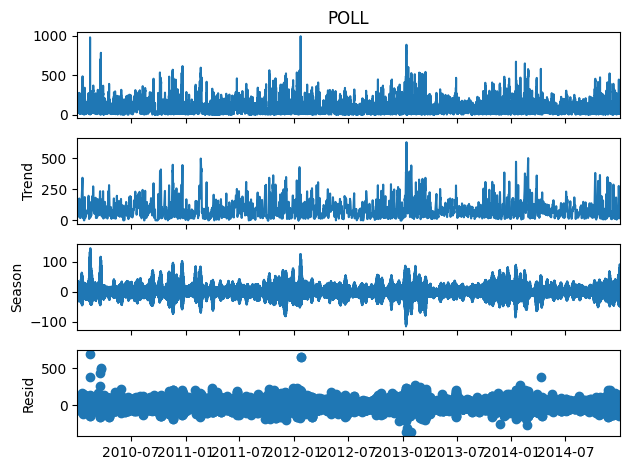

In [14]:
from statsmodels.tsa.seasonal import STL
stl = STL(data_poll_series, seasonal=13)
res = stl.fit()
fig = res.plot()

In [15]:
import pandas as pd
data_poll = data[['date', 'pollution']]
print(data_poll.head())

print(data_poll.describe())


         date  pollution
0  2010-01-02      129.0
1  2010-01-02      148.0
2  2010-01-02      159.0
3  2010-01-02      181.0
4  2010-01-02      138.0
          pollution
count  43800.000000
mean      94.013516
std       92.252276
min        0.000000
25%       24.000000
50%       68.000000
75%      132.250000
max      994.000000


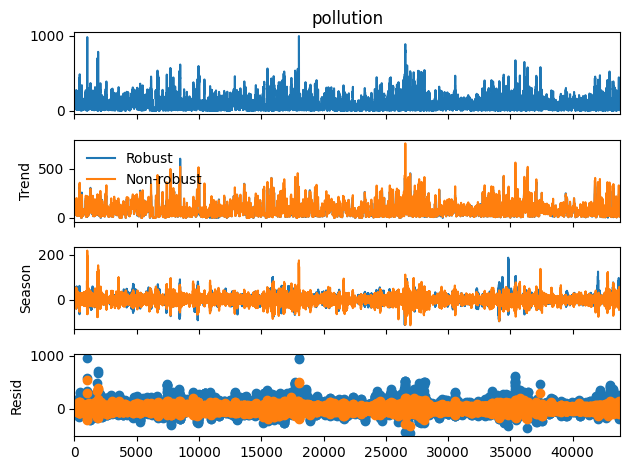

In [16]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)
    return series


stl = STL(data['pollution'], period=13, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()

res_non_robust = STL(data['pollution'], period=13, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

plt.show()


In [17]:
C=data.columns[1:]
data_gen=[]
for k in C:
  res_non_robust = STL(data[k], period=13, robust=False).fit()

  comps = ["trend", "seasonal", "resid"]
  for i in comps:
    series = getattr(res, i)
    col_name = f"{k}_{i}"
    if i=="trend":
      trend=series
    if i=="seasonal":
      seasonal=series
    if i=="resid":
      resid=series
    data_gen.append([col_name,series])
df_components = pd.DataFrame({col: series for col, series in data_gen})




In [18]:
df_components.head()

,pollution_trend,pollution_seasonal,pollution_resid,dew_trend,dew_seasonal,dew_resid,temp_trend,temp_seasonal,temp_resid,press_trend,...,wnd_spd_resid,snow_trend,snow_seasonal,snow_resid,rain_trend,rain_seasonal,rain_resid,wind_dir_trend,wind_dir_seasonal,wind_dir_resid
2010-01-02 00:00:00,140.530693,-9.868228,-1.662465,140.530693,-9.868228,-1.662465,140.530693,-9.868228,-1.662465,140.530693,...,-1.662465,140.530693,-9.868228,-1.662465,140.530693,-9.868228,-1.662465,140.530693,-9.868228,-1.662465
2010-01-02 01:00:00,140.232486,-12.187548,19.955062,140.232486,-12.187548,19.955062,140.232486,-12.187548,19.955062,140.232486,...,19.955062,140.232486,-12.187548,19.955062,140.232486,-12.187548,19.955062,140.232486,-12.187548,19.955062
2010-01-02 02:00:00,139.921668,-21.654775,40.733106,139.921668,-21.654775,40.733106,139.921668,-21.654775,40.733106,139.921668,...,40.733106,139.921668,-21.654775,40.733106,139.921668,-21.654775,40.733106,139.921668,-21.654775,40.733106
2010-01-02 03:00:00,139.597981,-15.221105,56.623124,139.597981,-15.221105,56.623124,139.597981,-15.221105,56.623124,139.597981,...,56.623124,139.597981,-15.221105,56.623124,139.597981,-15.221105,56.623124,139.597981,-15.221105,56.623124
2010-01-02 04:00:00,139.260115,-23.773891,22.513776,139.260115,-23.773891,22.513776,139.260115,-23.773891,22.513776,139.260115,...,22.513776,139.260115,-23.773891,22.513776,139.260115,-23.773891,22.513776,139.260115,-23.773891,22.513776


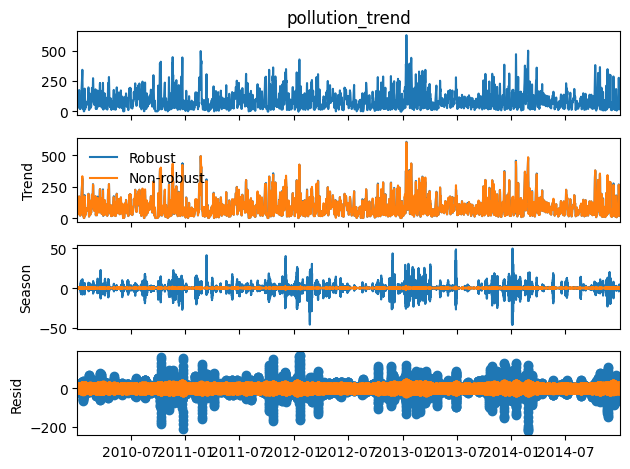

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt


stl = STL(df_components['pollution_trend'], period=13, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(df_components['pollution_trend'], period=13, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

plt.show()
